### ***Problem02***
---

In [1]:
### Import library & data set
# library
from google.colab import drive
drive.mount("/content/drive")
import sys
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Spambase
spambase = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW03A/spambase.csv"
spambase = pd.read_csv(spambase)
spambase = pd.DataFrame(spambase)
# MNIST
df = load_digits()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


train confusion matrix


<Figure size 300x300 with 0 Axes>

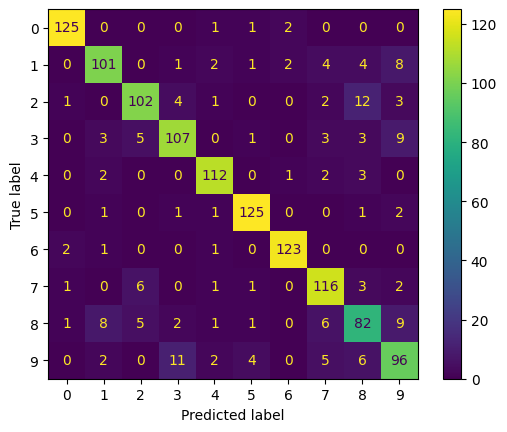



test confusion matrix


<Figure size 300x300 with 0 Axes>

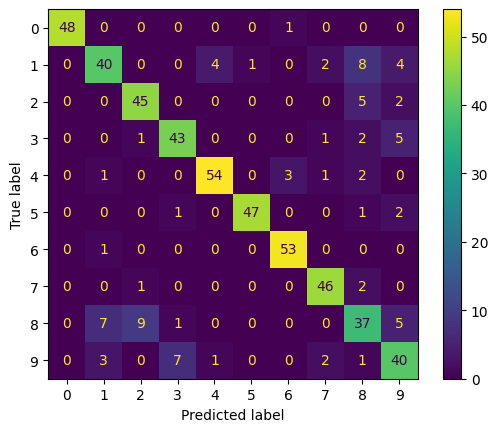

In [40]:
### (1)
# data split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=22)
# PCA
pca = PCA(n_components=5)
model = pca.fit(X_train)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
# logistic regression
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = l2_clf.predict(X_train)
y_pred_test = l2_clf.predict(X_test)
# evaluate (confusion matrix)
train_cm = confusion_matrix(y_train, y_pred_train)
train_cm = ConfusionMatrixDisplay(confusion_matrix=train_cm,display_labels=l2_clf.classes_)
test_cm = confusion_matrix(y_test, y_pred_test)
test_cm = ConfusionMatrixDisplay(confusion_matrix=test_cm,display_labels=l2_clf.classes_)
# plot
print("train confusion matrix")
plt.figure(figsize=(3,3))
train_cm.plot()
plt.show()
print("\n")
print("test confusion matrix")
plt.figure(figsize=(3,3))
test_cm.plot()
plt.show()

train confusion matrix


<Figure size 300x300 with 0 Axes>

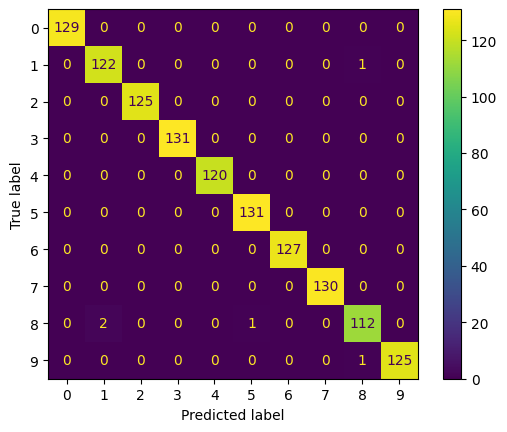



test confusion matrix


<Figure size 300x300 with 0 Axes>

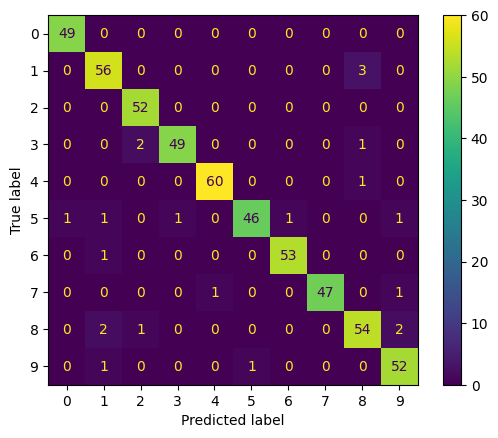

In [41]:
### pca d=20
# data split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=22)
# PCA
pca = PCA(n_components=20)
model = pca.fit(X_train)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
# logistic regression
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = l2_clf.predict(X_train)
y_pred_test = l2_clf.predict(X_test)
# evaluate (confusion matrix)
train_cm = confusion_matrix(y_train, y_pred_train)
train_cm = ConfusionMatrixDisplay(confusion_matrix=train_cm,display_labels=l2_clf.classes_)
test_cm = confusion_matrix(y_test, y_pred_test)
test_cm = ConfusionMatrixDisplay(confusion_matrix=test_cm,display_labels=l2_clf.classes_)
# plot
print("train confusion matrix")
plt.figure(figsize=(3,3))
train_cm.plot()
plt.show()
print("\n")
print("test confusion matrix")
plt.figure(figsize=(3,3))
test_cm.plot()
plt.show()

train confusion matrix
train precision: 0.87, train recall: 0.86


<Figure size 300x300 with 0 Axes>

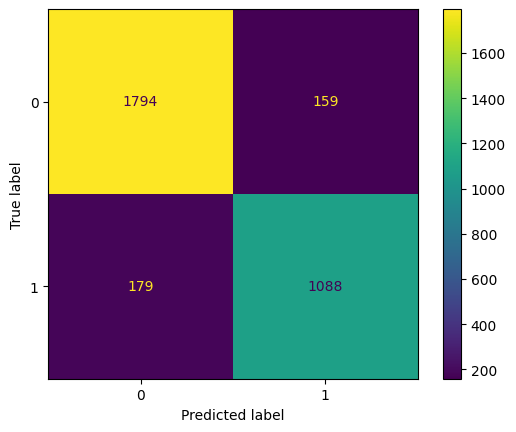



test confusion matrix
test precision: 0.89, test recall: 0.85


<Figure size 300x300 with 0 Axes>

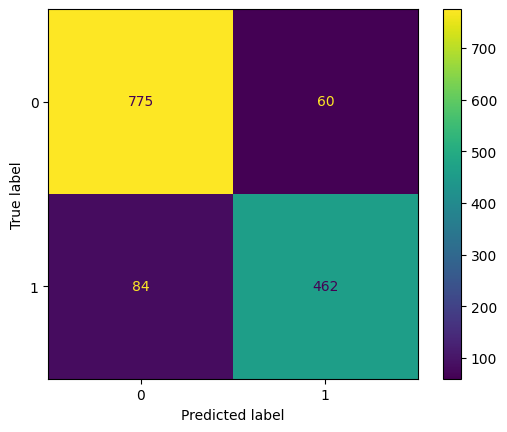

In [12]:
### spambase (The smallest d is 20)
y = spambase["spam"]
X = spambase.drop(columns=["spam"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, shuffle=True)
# PCA
pca = PCA(n_components=20)
model = pca.fit(X_train)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
# logistic regression
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = l2_clf.predict(X_train)
y_pred_test = l2_clf.predict(X_test)
# evaluate (confusion matrix)
train_cm = confusion_matrix(y_train, y_pred_train)
train_cm = ConfusionMatrixDisplay(confusion_matrix=train_cm,display_labels=l2_clf.classes_)
test_cm = confusion_matrix(y_test, y_pred_test)
test_cm = ConfusionMatrixDisplay(confusion_matrix=test_cm,display_labels=l2_clf.classes_)
# confusion matrix score
ps_train = round(precision_score(y_train, y_pred_train), 2)
rc_train = round(recall_score(y_train, y_pred_train), 2)
ps_test = round(precision_score(y_test, y_pred_test), 2)
rc_test = round(recall_score(y_test, y_pred_test), 2)
# plot
print("train confusion matrix")
print("train precision: {}, train recall: {}".format(ps_train,rc_train))
plt.figure(figsize=(3,3))
train_cm.plot()
plt.show()
print("\n")
print("test confusion matrix")
print("test precision: {}, test recall: {}".format(ps_test,rc_test))
plt.figure(figsize=(3,3))
test_cm.plot()
plt.show()